In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_excel('../../../My Tableau Repository/udemy_datasets/superstore_sample.xlsx')

In [3]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


# [Analytcis vidhya - A Comprehensive Guide to Data Exploration](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/)

## 1. Steps of Data Exploration and Preparation

Remember the quality of your inputs decide the quality of your output. So, once you have got your business hypothesis ready, it makes sense to spend lot of time and efforts here. With my personal estimate, data exploration, cleaning and preparation can take up to 70% of your total project time.

Below are the steps involved to understand, clean and prepare your data for building your predictive model:

1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation


Finally, we will need to iterate over steps 4 – 7 multiple times before we come up with our refined model.

### 1. Variable Identification

First, identify __Predictor (Input)__ and __Target (output)__ variables. 

Next, identify the __data type__ and __category__ of the variables.

![](1.variable_id.PNG)

### 2. Univariate Analysis

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous.

__Continuous Variables:__ In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics and visualization methods. Univariate analysis is also used to highlight missing and outlier values.

![](1.univariate.PNG)

__Categorical Variables:__ For categorical variables, we’ll use frequency table to understand distribution of each category. We can also read as percentage of values under each category. It can be be measured using two metrics, __Count__ and __Count%__ against each category. Bar chart can be used as visualization.




### 3. Bi-variate Analysis

Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process.

Let’s understand the possible combinations in detail:

####    1. __Continuous & Continuous:__ While doing bi-variate analysis between two continuous variables, we should look at scatter plot. It is a nifty way to find out the relationship between two variables. The pattern of scatter plot indicates the relationship between variables. The relationship can be linear or non-linear.

![](1.scatter-plot.PNG)

Scatter plot shows the relationship between two variable but does not indicates the strength of relationship amongst them. To find the strength of the relationship, we use Correlation. Correlation varies between -1 and +1.

- -1: perfect negative linear correlation
- +1:perfect positive linear correlation and 
-  0: No correlation

Correlation can be derived using following formula:

> __Correlation = Covariance(X,Y) / SQRT( Var(X)* Var(Y))__

####    2. __Categorical & Categorical:__ To find the relationship between two categorical variables, we can use following methods:
   
- __Two-way table:__ We can start analyzing the relationship by creating a two-way table of count and count%. The rows represents the category of one variable and the columns represent the categories of the other variable. We show count or count% of observations available in each combination of row and column categories.

In python it can be done using, The pandas crosstab function builds a cross-tabulation table that can show the frequency with which certain groups of data appear.

[pandas crosstab function](https://pbpython.com/pandas-crosstab.html)


In [4]:
pd.crosstab(df['Product Category'], df['Ship Mode'])

Ship Mode,Delivery Truck,Express Air,Regular Air
Product Category,,,
Furniture,956,139,838
Office Supplies,82,673,4426
Technology,245,295,1772


-  __Stacked Column Chart:__ This method is more of a visual form of Two-way table.
    
  ![](1.bivar.PNG)

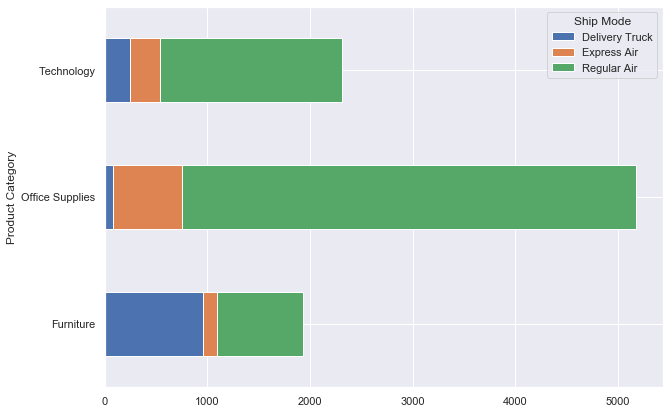

In [5]:
pd.crosstab(df['Product Category'], df['Ship Mode']).plot(kind='barh',figsize = (10,7), stacked = True)

Alternate way

In [6]:
temp = df.groupby('Product Category')['Ship Mode'].value_counts(normalize = True).unstack() * 100
temp

Ship Mode,Delivery Truck,Express Air,Regular Air
Product Category,,,
Furniture,49.456803,7.190895,43.352302
Office Supplies,1.582706,12.989770,85.427524
Technology,10.596886,12.759516,76.643599


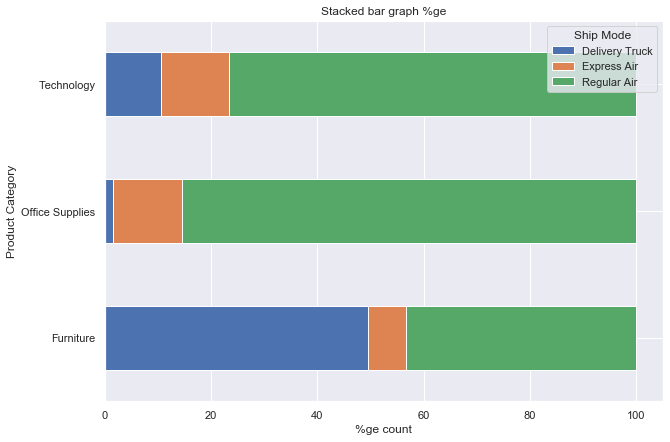

In [7]:
temp.plot(kind = 'barh', stacked = True, figsize = (10,7));
plt.xlabel("%ge count")
plt.title('Stacked bar graph %ge');

- Chi-squared Test

Reference: 
1. [A Gentle Introduction to the Chi-Squared Test for Machine Learning](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)
2. [Khan Academy Chi-squared Test](https://www.khanacademy.org/math/ap-statistics/chi-square-tests)

## Variable Transformation

Reference:
1. [Research gate why transformation required](https://www.researchgate.net/post/Why_do_we_do_transformation_before_data_analysis)
2. [Catalog of Variable Transformations To Make Your Model Work Better](https://towardsdatascience.com/catalog-of-variable-transformations-to-make-your-model-works-better-7b506bf80b97)


Blog to check

# [A Hands-On Guide to Automated Feature Engineering using Featuretools in Python](https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/)